<a href="https://colab.research.google.com/github/cyyeh/ds-portfolios/blob/master/projects/youbike/notebooks/1.0-youbike-history-data-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Youbike History Data EDA

reference: https://github.com/pixnet/2018-pixnet-hackathon/blob/master/opendata/pmo.opendata.md

- youbike station vacancy data
- from: 2018/1/1
- to: 2018/6/15
- update frequency: 5 minutes

In [0]:
# install chinese font
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip
!unzip NotoSerifCJKtc-hinted.zip
!mv NotoSerifCJKtc-Medium.otf /usr/share/fonts/truetype/

--2020-03-11 09:04:54--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c07::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130464138 (124M) [application/zip]
Saving to: ‘NotoSerifCJKtc-hinted.zip’

NotoSerifCJKtc-hint 100%[===================>] 124.42M  26.6MB/s    in 4.7s    

2020-03-11 09:05:04 (26.6 MB/s) - ‘NotoSerifCJKtc-hinted.zip’ saved [130464138/130464138]

Archive:  NotoSerifCJKtc-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSerifCJKtc-Black.otf  
  inflating: NotoSerifCJKtc-Bold.otf  
  inflating: NotoSerifCJKtc-ExtraLight.otf  
  inflating: NotoSerifCJKtc-Light.otf  
  inflating: NotoSerifCJKtc-Medium.otf  
  inflating: NotoSerifCJKtc-Regular.otf  
  inflating: NotoSe

## Get Data

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
from functools import partial

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/NotoSerifCJKtc-Medium.otf'
font_prop = fm.FontProperties(fname=font_path, size=15)

import warnings
warnings.filterwarnings("ignore")

In [0]:
def get_youbike_history_data(stop_no=None):
  FILE_PATHS = [
    'drive/My Drive/youbike-history-data-1.csv.zip',
    'drive/My Drive/youbike-history-data-2.csv.zip'
  ]

  FIELDS_LIST = [
    'stop_no', 
    'stop_name', 
    'total_number', 
    'current_number', 
    'stop_area', 
    'update_time', 
    'lat', 
    'lng', 
    'address', 
    'stop_area_en', 
    'stop_name_en',
    'address_en',
    'vacancy_number',
    'status',
    'batch_update_time',
    'db_update_time',
    'update_info_time',
    'update_info_date'
  ]

  FIELDS_TO_KEEP = [
      'stop_no',
      'stop_name',
      'stop_area',
      'lat',
      'lng',
      'total_number',
      'current_number',
      'vacancy_number',
      'status',
      'db_update_time'
  ]

  read_csv_func = partial(pd.read_csv, names=FIELDS_LIST)
  df = pd.concat(map(read_csv_func, FILE_PATHS), sort=True)
  df = df[FIELDS_TO_KEEP]
  df['db_update_time'] = pd.to_datetime(df['db_update_time'])
  df = df[df['status'] == 1] # enabled
  df['weekday'] = df['db_update_time'].dt.weekday
  df['is_weekend'] = (df['weekday'] == 5) | (df['weekday'] == 6)

  if stop_no:
    df = (df[df['stop_no'] == stop_no]
            .sort_values('db_update_time')
            .set_index('db_update_time'))
  else:
    df = (df.groupby('stop_no')
            .apply(pd.DataFrame.sort_values, 'db_update_time')
            .set_index(['stop_no', 'db_update_time']))

  return df

In [0]:
df = get_youbike_history_data(stop_no=186) #台北市立大學

In [0]:
df

,stop_no,stop_name,stop_area,lat,lng,total_number,current_number,vacancy_number,status,weekday,is_weekend
db_update_time,,,,,,,,,,,
2018-01-01 00:10:00,186,臺北市立大學,中正區,25.0354,121.514,82,29,53,1,0,False
2018-01-01 00:15:00,186,臺北市立大學,中正區,25.0354,121.514,82,29,53,1,0,False
2018-01-01 00:20:00,186,臺北市立大學,中正區,25.0354,121.514,82,30,52,1,0,False
2018-01-01 00:25:00,186,臺北市立大學,中正區,25.0354,121.514,82,24,58,1,0,False
2018-01-01 00:30:00,186,臺北市立大學,中正區,25.0354,121.514,82,23,59,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...
2018-06-15 23:40:00,186,臺北市立大學,中正區,25.0354,121.514,82,3,78,1,4,False
2018-06-15 23:45:00,186,臺北市立大學,中正區,25.035414000000,121.514218000000,82,4,77,1,4,False
2018-06-15 23:50:00,186,臺北市立大學,中正區,25.0354,121.514,82,3,78,1,4,False


In [0]:
df.to_pickle('1.0-youbike-history-data-186-df.pkl')

## EDA

In [0]:
df.head()

,stop_no,stop_name,stop_area,lat,lng,total_number,current_number,vacancy_number,status,weekday,is_weekend
db_update_time,,,,,,,,,,,
2018-01-01 00:10:00,186,臺北市立大學,中正區,25.0354,121.514,82,29,53,1,0,False
2018-01-01 00:15:00,186,臺北市立大學,中正區,25.0354,121.514,82,29,53,1,0,False
2018-01-01 00:20:00,186,臺北市立大學,中正區,25.0354,121.514,82,30,52,1,0,False
2018-01-01 00:25:00,186,臺北市立大學,中正區,25.0354,121.514,82,24,58,1,0,False
2018-01-01 00:30:00,186,臺北市立大學,中正區,25.0354,121.514,82,23,59,1,0,False


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43788 entries, 2018-01-01 00:10:00 to 2018-06-16 00:00:00
Data columns (total 11 columns):
stop_no           43788 non-null int64
stop_name         43788 non-null object
stop_area         43788 non-null object
lat               43788 non-null object
lng               43788 non-null object
total_number      43788 non-null int64
current_number    43788 non-null int64
vacancy_number    43788 non-null int64
status            43788 non-null int64
weekday           43788 non-null int64
is_weekend        43788 non-null bool
dtypes: bool(1), int64(6), object(4)
memory usage: 3.7+ MB


In [0]:
df['status'].value_counts()

1    43788
Name: status, dtype: int64

In [0]:
def plot_youbike_mean_available_number(df, freq='realtime'):
  freq_dict = {
      'realtime': '5 Minutes(realtime)',
      'H': 'Hour',
      'D': 'Day',
      'M': 'Month'
  }

  if freq == 'realtime':
    df_ = df
  else:
    df_ = df.resample(freq).mean()

  x = df_.index
  y = df_.current_number
  plt.figure(figsize=(12, 8))
  plt.title(
      f"Youbike Mean Available Number per {freq_dict[freq]} at University of Taipei",
      color='white',
      fontsize=16
  )
  plt.xticks(color='white', fontsize=14)
  plt.yticks(color='white', fontsize=14)
  plt.plot(x, y);

### Plot number of youbike available per month

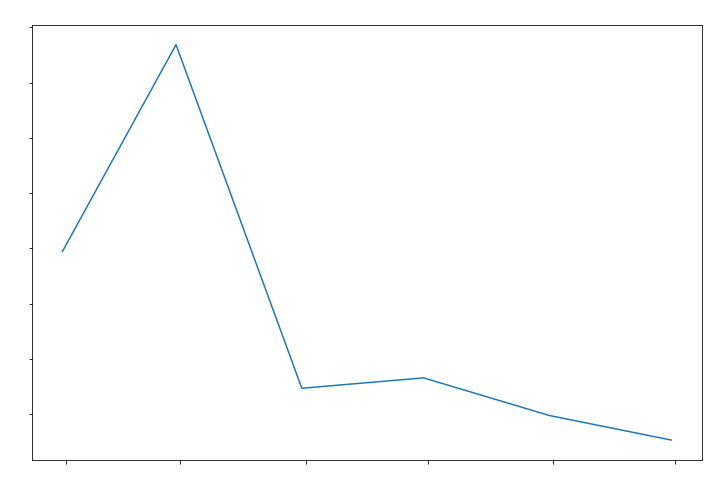

In [0]:
plot_youbike_mean_available_number(df, freq='M')

### Plot number of youbike available per day

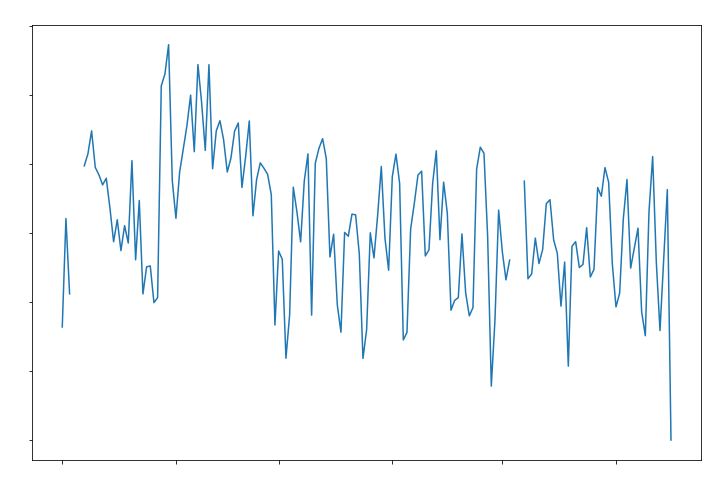

In [0]:
plot_youbike_mean_available_number(df, freq='D')

### Plot number of youbike available per hour

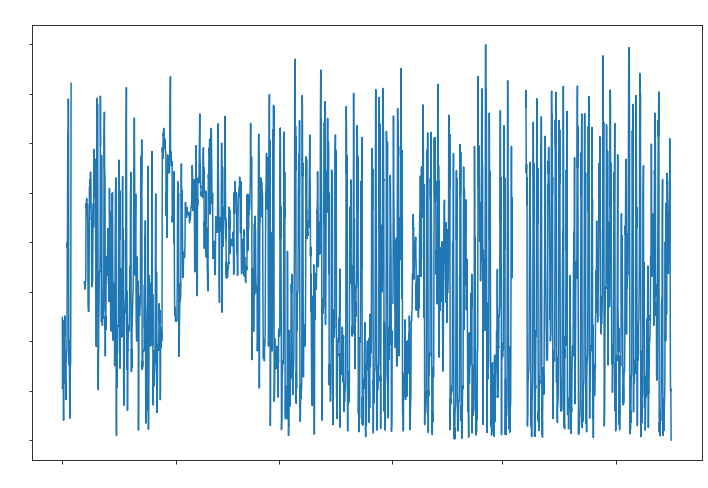

In [0]:
plot_youbike_mean_available_number(df, freq='H')

### Plot number of youbike available per 5 minutes

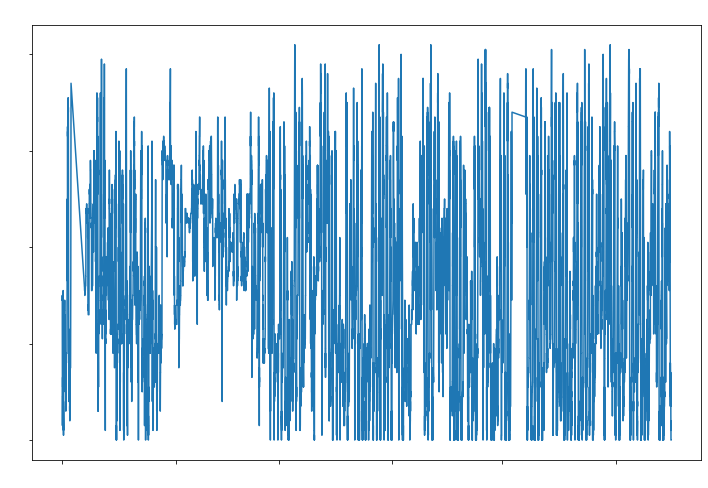

In [0]:
plot_youbike_mean_available_number(df)